In [1]:
# Predicting soluble expression 

In [6]:
# get the expression data 

import pandas

df = pandas.read_csv( 'data_sets/experimental/expression_cat.csv', index_col=0 ) 
df.expression = df.expression.astype( bool ).astype( int ) 

# get the features (enzyme design) 

f = pandas.read_csv( 'data_sets/calculated/enzyme_design_talaris_2014.csv' ) 
f = f.groupby( 'name' ).apply( lambda x: x.sort_values( by='total_score' ).head(10).mean() )

df = df.join( f ).dropna()

df.shape

(134, 61)

In [7]:
# we will use 45 features and 131 protein models (each is average of lowest 10 by total_score) 
# to train an SVM classifier 

features = [
    u'total_score', u'fa_rep', u'hbond_sc',
    u'all_cst', u'tot_pstat_pm', u'tot_nlpstat_pm', u'tot_burunsat_pm',
    u'tot_hbond_pm', u'tot_NLconts_pm', u'tot_nlsurfaceE_pm',
    u'SR_1_total_score', u'SR_1_fa_rep',
    u'SR_1_hbond_sc', u'SR_1_hbond_pm',
    u'SR_1_burunsat_pm', u'SR_1_pstat_pm', u'SR_1_nlpstat_pm', 
    u'SR_2_total_score', u'SR_2_fa_rep', u'SR_2_hbond_sc', 
    u'SR_2_hbond_pm', u'SR_2_burunsat_pm', u'SR_2_pstat_pm',
    u'SR_2_nlpstat_pm', u'SR_3_total_score', u'SR_3_fa_rep',
    u'SR_3_hbond_sc', u'SR_3_hbond_pm',
    u'SR_3_burunsat_pm', u'SR_3_pstat_pm', u'SR_3_nlpstat_pm',
    u'SR_4_total_score', u'SR_4_fa_rep', u'SR_4_hbond_sc', 
    u'SR_4_hbond_pm', u'SR_4_burunsat_pm', u'SR_4_pstat_pm',
    u'SR_4_nlpstat_pm', u'SR_5_total_score', u'SR_5_fa_rep',
    u'SR_5_hbond_sc', u'SR_5_interf_E_1_2',
    u'SR_5_dsasa_1_2', u'SR_5_hbond_pm', u'SR_5_burunsat_pm'
]

X = df[ features ] #.as_matrix() 
y = df[ 'expression' ] #.as_matrix()

X.shape, y.shape

((134, 45), (134,))

In [54]:
# streamlined version 

import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import StratifiedKFold, cross_val_score

cv = StratifiedKFold( y, n_folds=10, shuffle=True )
classifier = svm.SVC( kernel='rbf', C=1 )
cross_val = cross_val_score( classifier, X, y, cv=cv ) 

print 'mean accuracy:', cross_val.mean()

mean accuracy: 0.803113553114


0 done, 1 done, 2 done, 3 done, 4 done, 5 done, 6 done, 7 done, 8 done, 9 done,

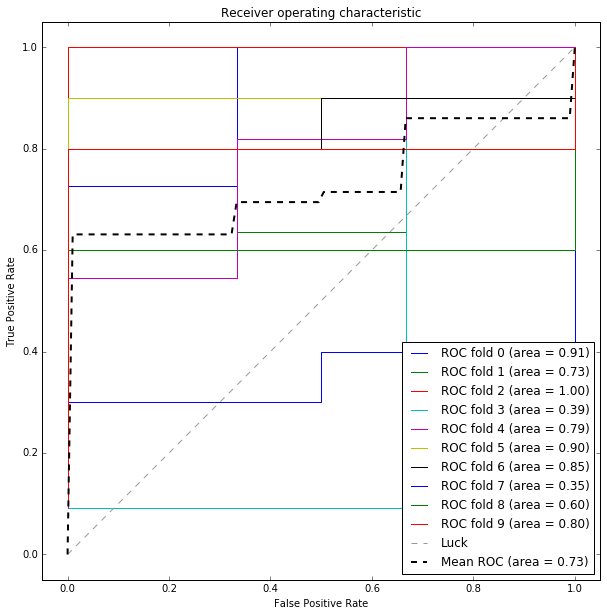

In [57]:
# make a plot of cross validation performance with auc for each fold 

%matplotlib inline
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import StratifiedKFold

cv = StratifiedKFold( y, n_folds=10, shuffle=True )
classifier = svm.SVC( kernel='rbf', probability=True, random_state=1 )

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

plt.figure( figsize=(10,10) )

for i, (train, test) in enumerate(cv):
    print i, 
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
    print 'done,',  

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--', label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()